In [2]:
%matplotlib inline
import numpy as np
import itertools
import logging

from config import CFG
from dataset import load_and_prepare_data
from kde_classes import Model, KDE

from models.multi_gaussian import settings, grid
#from models.E_sig import settings, grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Logging setup utilities
from debugging import (
    setup_logger,
    setup_console_handler
)

In [3]:
setup_logger('KDE', logging.DEBUG)
log_format = '%(asctime)s %(processName)s %(name)s %(levelname)s: '\
             '%(message)s'
setup_console_handler('KDE', logging.DEBUG, log_format)

In [4]:
mc = np.load(CFG['paths']['mg_mc'])
#mc = load_and_prepare_data(CFG['paths']['IC_mc'])
model = Model(mc, settings, weighting=None)

2019-07-09 16:03:07,420 MainProcess KDE.kde_classes.Model INFO: Using ones as weight.


In [5]:
kde = KDE(model)

                   y INFO: Creating 1D phase space in range (-5.000000, 5.000000)
                   x INFO: Creating 1D phase space in range (-5.000000, 5.000000)
        PhspCombined INFO: Creating combined phase space of 2 components
        PhspCombined INFO: Adding component phase space "y", dim=1
        PhspCombined INFO: Adding component phase space "x", dim=1
        PhspCombined INFO: Resulting dimensionality is 2


In [6]:
out_bins = []
for key in settings:
    out_bins.append(np.linspace(settings[key]['range'][0],
                                settings[key]['range'][1],
                                settings[key]['nbins']))
coords = np.array(list(itertools.product(*out_bins)))
X, Y = np.meshgrid(*out_bins)

In [7]:
binned_kernel_density = kde.generate_binned_kd([0.5, 0.5])

 BinnedKernelDensity INFO: Creating binned kernel density over 2D phase space
 BinnedKernelDensity INFO: Map size=10000
 BinnedKernelDensity INFO: Using variable "weight" as weight
 BinnedKernelDensity INFO: Will read 10000 events (skipping first 0)
 BinnedKernelDensity INFO: Will read branch "y" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "x" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "weight" from tree "tree"
 BinnedKernelDensity INFO: 9841 events read in from "tree", 159 out
 BinnedKernelDensity INFO: Will use uniform density for approximation
 BinnedKernelDensity INFO: Convolution of approx. density using rectangular grid
 BinnedKernelDensity INFO: Normalising density
 BinnedKernelDensity INFO: Average PDF value before normalisation is 0.989048


In [8]:
pdf_vals = np.asarray([kde.eval_point(binned_kernel_density, coord) for coord in coords])
pdf_vals = pdf_vals.reshape(model.nbins)

 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.000000
 BinnedKer

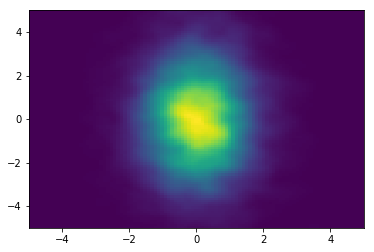

In [9]:
plt.figure()

plt.pcolormesh(X, Y, pdf_vals)

Text(0.5,0,'y, $\\sigma=2$')

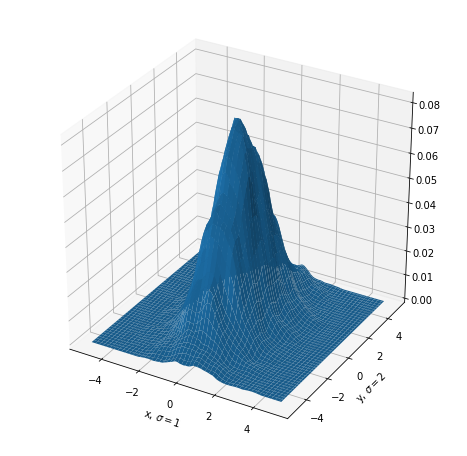

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

Generate adaptive kde

In [11]:
adaptive_kernel_density = kde.generate_adaptive_kd([0.5, 0.5])

 BinnedKernelDensity INFO: Creating binned kernel density over 2D phase space
 BinnedKernelDensity INFO: Map size=10000
 BinnedKernelDensity INFO: Using variable "weight" as weight
 BinnedKernelDensity INFO: Will read 10000 events (skipping first 0)
 BinnedKernelDensity INFO: Will read branch "y" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "x" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "weight" from tree "tree"
 BinnedKernelDensity INFO: 9841 events read in from "tree", 159 out
 BinnedKernelDensity INFO: Will use uniform density for approximation
 BinnedKernelDensity INFO: Convolution of approx. density using rectangular grid
 BinnedKernelDensity INFO: Normalising density
 BinnedKernelDensity INFO: Average PDF value before normalisation is 0.989048
AdaptiveKernelDensit INFO: Creating binned adaptive kernel density over 2D phase space
AdaptiveKernelDensit INFO: Map size=10000
AdaptiveKernelDensit INFO: Using variable "weight" as weight
AdaptiveKernelDe

In [12]:
adaptive_pdf_vals = np.asarray([kde.eval_point(adaptive_kernel_density, coord) for coord in coords])
adaptive_pdf_vals = adaptive_pdf_vals.reshape(model.nbins)

AdaptiveKernelDensit WARNING: dim 1: x=-1.363636, weight=1.000000
AdaptiveKernelDensit WARNING: dim 1: x=-1.363636, weight=1.000000
AdaptiveKernelDensit WARNING: dim 1: x=-1.363636, weight=-0.000000
AdaptiveKernelDensit WARNING: dim 1: x=-1.363636, weight=-0.000000
AdaptiveKernelDensit WARNING: dim 1: x=-1.363636, weight=1.000000
AdaptiveKernelDensit WARNING: dim 1: x=-1.363636, weight=1.000000
AdaptiveKernelDensit WARNING: dim 1: x=-1.363636, weight=-0.000000
AdaptiveKernelDensit WARNING: dim 1: x=-1.363636, weight=-0.000000
AdaptiveKernelDensit WARNING: dim 1: x=1.969697, weight=1.000000
AdaptiveKernelDensit WARNING: dim 1: x=1.969697, weight=1.000000
AdaptiveKernelDensit WARNING: dim 1: x=1.969697, weight=-0.000000
AdaptiveKernelDensit WARNING: dim 1: x=1.969697, weight=-0.000000
AdaptiveKernelDensit WARNING: dim 1: x=1.969697, weight=1.000000
AdaptiveKernelDensit WARNING: dim 1: x=1.969697, weight=1.000000
AdaptiveKernelDensit WARNING: dim 1: x=1.969697, weight=-0.000000
AdaptiveKe

Text(0.5,0,'y, $\\sigma=2$')

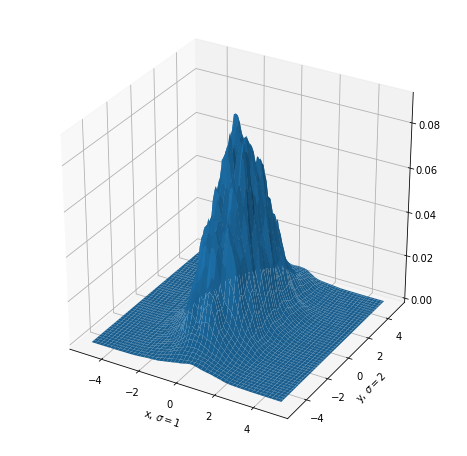

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, adaptive_pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

Plot mc data

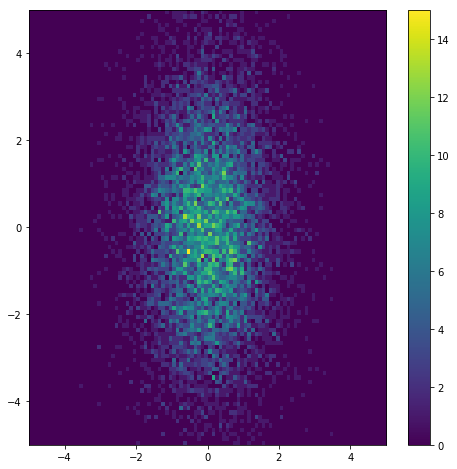

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
h = ax.hist2d(mc['x'], mc['y'], bins=[100, 100], range=[[-5, 5], [-5, 5]])
#h = ax.hist2d(np.log10(mc['sigma_pull_corrected']), mc['logE'], bins=[100, 100], range=[[0, 1], [0, 10]])
fig.colorbar(h[3], ax=ax)


In [15]:
cv_result = kde.cross_validate([0.5, 0.5], adaptive=False)

                   y INFO: Creating 1D phase space in range (-5.000000, 5.000000)
                   x INFO: Creating 1D phase space in range (-5.000000, 5.000000)
        PhspCombined INFO: Creating combined phase space of 2 components
        PhspCombined INFO: Adding component phase space "y", dim=1
        PhspCombined INFO: Adding component phase space "x", dim=1
        PhspCombined INFO: Resulting dimensionality is 2
 BinnedKernelDensity INFO: Creating binned kernel density over 2D phase space
 BinnedKernelDensity INFO: Map size=10000
 BinnedKernelDensity INFO: Using variable "weight" as weight
 BinnedKernelDensity INFO: Will read 8000 events (skipping first 0)
 BinnedKernelDensity INFO: Will read branch "y" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "x" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "weight" from tree "tree"
 BinnedKernelDensity INFO: 7865 events read in from "tree", 135 out
 BinnedKernelDensity INFO: Will use uniform density for

In [16]:
cv_result

array([(0.5, 0.5, -3.3874357, 0.)],
      dtype=[('y_bandwidth', '<f4'), ('x_bandwidth', '<f4'), ('LLH', '<f4'), ('Zeros', '<f4')])

In [17]:
result = kde.cross_validate_bandwidths(adaptive=True)

2019-07-09 16:03:30,957 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.1)
2019-07-09 16:03:33,452 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.2)
2019-07-09 16:03:35,542 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.30000000000000004)
2019-07-09 16:03:37,696 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.4)
2019-07-09 16:03:39,928 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.5)
2019-07-09 16:03:42,246 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.6)
2019-07-09 16:03:44,905 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.7000000000000001)
2019-07-09 16:03:47,298 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.8)
2019-07-09 16:03:49,750 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 0.9)
2019-07-09 16:03:52,216 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.3, 1.0)
2019-07-09 16:03:54,746 MainProcess KDE.kde_classes.KDE INFO: Bandwidth: (0.4, 0.1)
2019-07-09 16:03:56,773 MainProcess KDE.kde_c

In [18]:
result

array([(0.3, 0.1, -3.4205275, 0.), (0.3, 0.2, -3.4162083, 0.),
       (0.3, 0.3, -3.4045095, 0.), (0.3, 0.4, -3.4007936, 0.),
       (0.3, 0.5, -3.3988147, 0.), (0.3, 0.6, -3.3983145, 0.),
       (0.3, 0.7, -3.3998637, 0.), (0.3, 0.8, -3.4006503, 0.),
       (0.3, 0.9, -3.4022357, 0.), (0.3, 1. , -3.403896 , 0.),
       (0.4, 0.1, -3.414853 , 0.), (0.4, 0.2, -3.4070747, 0.),
       (0.4, 0.3, -3.3991807, 0.), (0.4, 0.4, -3.3984194, 0.),
       (0.4, 0.5, -3.3968585, 0.), (0.4, 0.6, -3.3969953, 0.),
       (0.4, 0.7, -3.3976567, 0.), (0.4, 0.8, -3.3990238, 0.),
       (0.4, 0.9, -3.4007635, 0.), (0.4, 1. , -3.4027193, 0.),
       (0.5, 0.1, -3.4069867, 0.), (0.5, 0.2, -3.4032302, 0.),
       (0.5, 0.3, -3.396876 , 0.), (0.5, 0.4, -3.3952317, 0.),
       (0.5, 0.5, -3.394873 , 0.), (0.5, 0.6, -3.3948772, 0.),
       (0.5, 0.7, -3.3959565, 0.), (0.5, 0.8, -3.3974893, 0.),
       (0.5, 0.9, -3.39942  , 0.), (0.5, 1. , -3.4013753, 0.),
       (0.6, 0.1, -3.4074142, 0.), (0.6, 0.2, -3.399697

In [19]:
result[result['LLH'] == np.max(result['LLH'])]

array([(0.6, 0.5, -3.3934019, 0.)],
      dtype=[('y_bandwidth', '<f4'), ('x_bandwidth', '<f4'), ('LLH', '<f4'), ('Zeros', '<f4')])